<a href="https://colab.research.google.com/github/SDprasanth0012/playground/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai',context='notebook',ticks=True,grid = False)

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
tweet_df = pd.read_csv('/content/drive/MyDrive/project1/Twitter_Sentiments.csv')

In [8]:
tweet_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [9]:
tweet_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [10]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
tweet_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [12]:
tweet_df= tweet_df.drop(['id'] ,axis=1)

after dropping id column form the data set the tweet_df looks like this

In [13]:
tweet_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

explorting the dataset

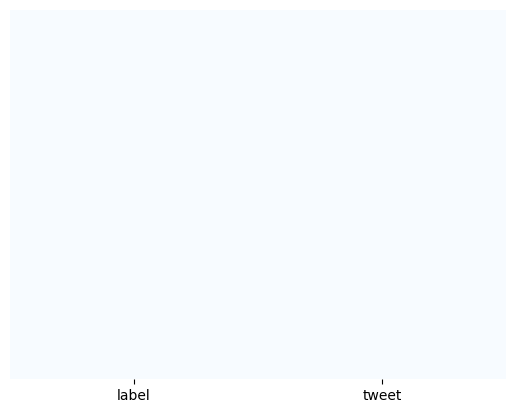

In [14]:
sns.heatmap(tweet_df.isnull(),yticklabels=False,cbar=False,cmap="Blues");

array([[<Axes: title={'center': 'label'}>]], dtype=object)

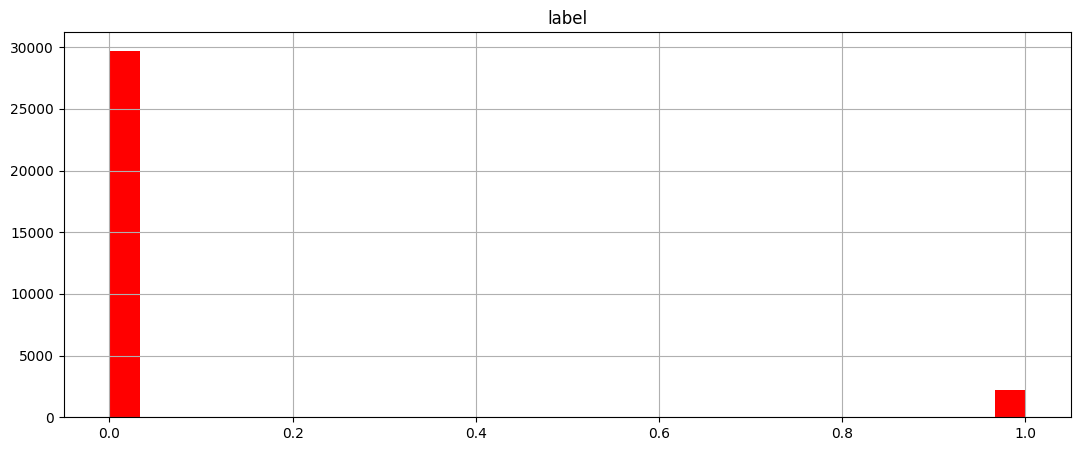

In [15]:
tweet_df.hist(bins=30,figsize=(13,5),color='r')

as we have only number elemnt label hist ignores text data and plots only for label

In [ ]:
sns.countplot(  tweet_df['label'],  label = 'Count'  )

In [ ]:
tweet_df['length'] = tweet_df['tweet'].apply(len)
tweet_df

<Axes: ylabel='Frequency'>

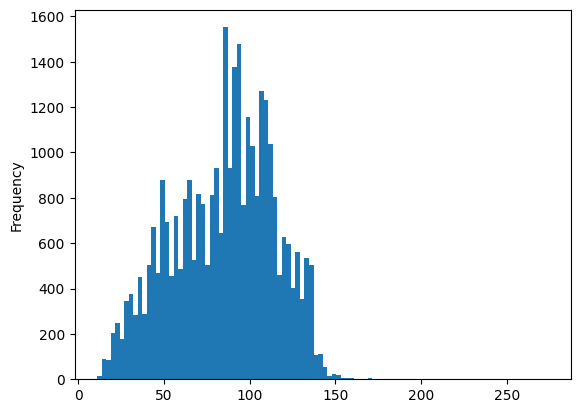

In [ ]:
tweet_df['length'].plot(bins=100,kind='hist')

In [ ]:
tweet_df[tweet_df['length']== 85]['tweet'].iloc[0]

' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

In [ ]:
positive = tweet_df[tweet_df['label']==0]
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [ ]:
negitive = tweet_df[tweet_df['label']==1]
negitive

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [ ]:
sentences = tweet_df['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [ ]:
len(sentences)

31962

In [ ]:
senetence_as_one_string= "".join(sentences)
senetence_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run@user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked  bihday your majesty#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦   factsguide: society now    #motivation[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo   @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girlwe won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦  @user @user welcome here !  i\'m   it\'s so #gr8 !  â\x86\x9d #ireland consumer price index (mom) climbed from previous 0.2%

In [ ]:
!pip install wordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.figure(figsize = (50,50))

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

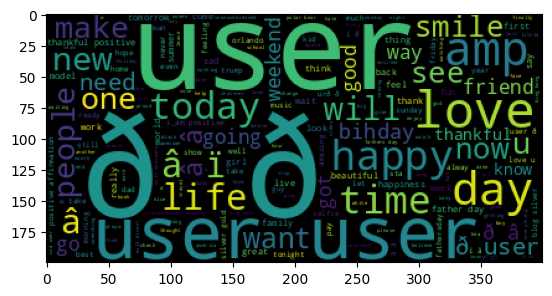

In [ ]:
plt.imshow(WordCloud().generate(senetence_as_one_string));

In [ ]:
negitive_list = negitive['tweet'].tolist()
negitive_list
negitive_as_one_str = "".join(negitive_list)
negitive_as_one_str

'@user #cnn calls #michigan middle school \'build the wall\' chant \'\' #tcot  no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphinsretweet if you agree! @user @user lumpy says i am a . prove it lumpy.it\'s unbelievable that in the 21st century we\'d need something like this. again. #neverump  #xenophobia @user lets fight against  #love #peace ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness  @user hey, white people: you can call people \'white\' by @user  #race  #identity #medâ\x80¦how the #altright uses  &amp; insecurity to lure men into #whitesupremacy    @user i\'m not interested in a #linguistics that doesn\'t address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦@user why not @user mocked obama for being black.  @user @user @user @user #brexit#people aren\'t protesting #trump because a #republican won-they do so because trump has fuhered  &amp;â

In [ ]:
positive_list = positive['tweet'].tolist()
positive_as_one_str = "".join(positive_list)
positive_as_one_str

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run@user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked  bihday your majesty#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦   factsguide: society now    #motivation[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo   @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girlwe won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦  @user @user welcome here !  i\'m   it\'s so #gr8 !  â\x86\x9d #ireland consumer price index (mom) climbed from previous 0.2%

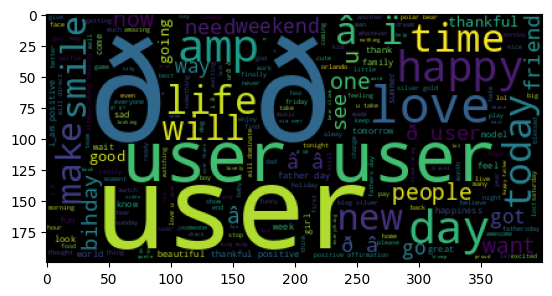

In [ ]:
plt.imshow(WordCloud().generate(positive_as_one_str))

data cleaning is to be performed in three different steps
1. removing punctuation from the sentences

In [ ]:
import string

string.punctuation

Text = " good morning ! beautiful peopele... :) i'm having a great day , hope you're doing well"
Text

" good morning ! beautiful peopele... :) i'm having a great day , hope you're doing well"

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def message_cleaning(message):
    message_punc_rem = [ ch for ch in message if ch not in string.punctuation]
    message_punc_rem_join = ''.join(message_punc_rem)
    message_punc_rem_join_clean = [ word for word in message_punc_rem_join.split() if word.lower() not in stopwords.words('english')]
    return message_punc_rem_join_clean

In [ ]:
tweet_df_clean = tweet_df['tweet'].apply(message_cleaning)

In [ ]:
tweet_df_clean[29]

['50',
 'people',
 'went',
 'nightclub',
 'good',
 'night',
 '1',
 'mans',
 'actions',
 'means',
 'people',
 'lost',
 'families',
 'forever',
 'riporlando']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(analyzer= message_cleaning)
tweet_vectorizer = CountVectorizer(analyzer = message_cleaning , dtype = 'uint8').fit_transform(tweet_df['tweet']).toarray()

In [ ]:
X = tweet_vectorizer
Y = tweet_df['label']

In [4]:
from sklearn.model_selection import  train_test_split
X_train,X_test, Y_train,  Y_test =  train_test_split(X,Y, test_size = 0.20)

NameError: name 'X' is not defined

In [3]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)

NameError: name 'X_train' is not defined